# 线性回归预测房价
**任务**  
基于usa_housing_price.csv数据，建立线性回归模型，预测合理房价：  
   - 1.以面积为输入变量，建立**单因子**模型，评估模型表现，可视化线性回归预测结果
   - 2.以income、house_age、numbers of rooms、population、area为输入变量，建立**多因子**模型，评估模型表现
   - 3.预测income=65000，house_age=5，numbers of rooms=5，population=30000,size=200的合理房价

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#load the data
data=pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273544,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


Text(0.5, 1.0, 'Price VS size')

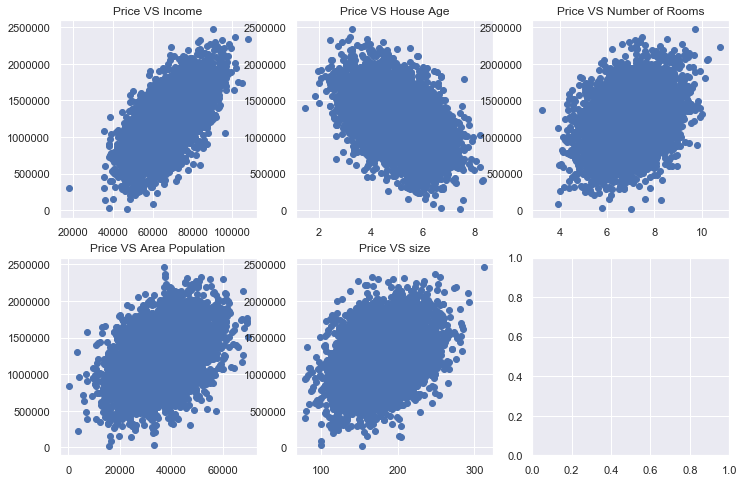

In [3]:
#数据可视化分析
sns.set()
fig,ax=plt.subplots(2,3,figsize=(12,8))
ax[0][0].scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])
ax[0][0].set_title('Price VS Income')
ax[0][1].scatter(data.loc[:,'Avg. Area House Age'],data.loc[:,'Price'])
ax[0][1].set_title('Price VS House Age')
ax[0][2].scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price'])
ax[0][2].set_title('Price VS Number of Rooms')
ax[1][0].scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])
ax[1][0].set_title('Price VS Area Population')
ax[1][1].scatter(data.loc[:,'size'],data.loc[:,'Price'])
ax[1][1].set_title('Price VS size')

In [4]:
#define X and y
X = np.array(data.loc[:,'size']).reshape(-1,1)
y = np.array(data.loc[:,'Price']).reshape(-1,1)

#set up the linear regression model
LR1=LinearRegression()

#train the model
LR1.fit(X,y)

#make prediction
y_predict_1=LR1.predict(X)

#evaluate the model
mse_1= mean_squared_error(y,y_predict_1)
r2_1= r2_score(y,y_predict_1)

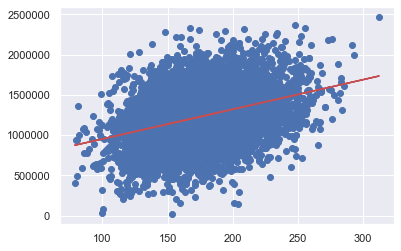

In [5]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,y_predict_1,'r')

In [6]:
#define X_multi
X_multi = data.drop(['Price'],axis=1)
print('X_multi.shape:',X_multi.shape,
      '\ny.shape:',y.shape)

#set up 2nd linear model
LR_multi=LinearRegression()

#train the model
LR_multi.fit(X_multi,y)

#make prediction
y_predict_multi=LR_multi.predict(X_multi)

#evaluate the model
mse_multi=mean_squared_error(y,y_predict_multi)
r2_multi=r2_score(y,y_predict_multi)

X_multi.shape: (5000, 5) 
y.shape: (5000, 1)


In [7]:
print(LR_multi.coef_)
print(LR_multi.intercept_)

[[ 2.16311170e+01 -1.66262626e+05  1.23736170e+05  1.51327027e+01
  -8.62595795e+01]]
[-813067.29152618]


In [8]:
X_test = [[65000,5,5,30000,200]]
print(LR_multi.predict(X_test))

[[817052.19516299]]


In [9]:
#单因子和多因子归回分析效果对比
print('    mse_1:',mse_1,'     r2_1:',r2_1)
print('mse_multi:',mse_multi,'r2_multi:',r2_multi)

    mse_1: 108771672553.6264      r2_1: 0.1275031240418234
mse_multi: 10219846512.177862 r2_multi: 0.9180229195220739


**MSE越小越好,R2分数越接近1越好**

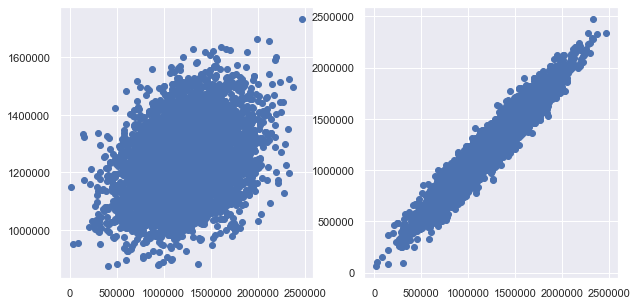

In [10]:
fig2=plt.figure(figsize=(10,5))
fig2.add_subplot(1,2,1)
plt.scatter(y,y_predict_1)
fig2.add_subplot(1,2,2)
plt.scatter(y,y_predict_multi)

**y' vs y集中度越高越好（越接近直线分布）**

# 线性回归房价实战总结
   - 1.通过搭建线性回归模型，实现单因子的房屋价格预测。
   - 2.在单因子模型效果不好的情况下，通过考虑更多的因子，建立了多因子模型。
   - 3.多因子模型达到了更好的预测效果，r2_score为0.91
   - 4.实现了预测结果的可视化，直观对比预测价格与实际价格的差异